<a href="https://colab.research.google.com/github/yosbel-penate/AppEFThreading/blob/master/ETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mejor día para compra de ETH de acuerdo a análisis histórico de apertura y cierre

Fuente de dataset: https://www.cryptodatadownload.com/


##  1. Obtener dataset completo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alnunez/crypto_coins_historical_data/main/Binance_ETHUSDT_d.csv', skiprows=[0])
df.sample(3)

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
849,1.551139e+12,2019-02-26 00:00:00,ETH/USDT,137.88,138.41,133.72,136.22,432944.17033,5.897993e+07,145787.0
70,1.618445e+12,2021-04-15 00:00:00,ETH/USDT,2432.59,2543.47,2400.00,2514.04,681950.96645,1.680063e+09,1462768.0
1007,1.537488e+12,2018-09-21 00:00:00,ETH/USDT,224.00,252.11,220.66,247.73,841029.12948,1.952257e+08,257566.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1409 non-null   float64
 1   date         1409 non-null   object 
 2   symbol       1409 non-null   object 
 3   open         1409 non-null   float64
 4   high         1409 non-null   float64
 5   low          1409 non-null   float64
 6   close        1409 non-null   float64
 7   Volume ETH   1409 non-null   float64
 8   Volume USDT  1409 non-null   float64
 9   tradecount   1285 non-null   float64
dtypes: float64(8), object(2)
memory usage: 110.2+ KB


## 2. Limpiar datos

In [ ]:
# Eliminar columnas irrelevantes
df.drop(['unix',	'symbol',	'high',	'low',	'Volume USDT',	'Volume ETH',	'tradecount'], axis=1, inplace=True) 

In [ ]:
# Restrigir datos a 365 días
df = df.head(365)
df

,date,open,close
0,2021-06-24 00:00:00,1967.95,1962.17
1,2021-06-23 00:00:00,1879.29,1968.14
2,2021-06-22 00:00:00,1885.27,1879.28
3,2021-06-21 00:00:00,2243.49,1885.49
4,2021-06-20 00:00:00,2165.34,2243.47
...,...,...,...
360,2020-06-29 00:00:00,224.89,227.93
361,2020-06-28 00:00:00,220.94,224.93
362,2020-06-27 00:00:00,229.66,220.94
363,2020-06-26 00:00:00,232.49,229.64


In [ ]:
# Crear la columna delta
df.insert(3, 'delta', df['close']-df['open'])  

In [ ]:
# Hallar % de variación diario
df.insert(2, '% var', (df['delta']/df['open'])*100)

In [ ]:
# Convertir formato de date a tipo datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Convertir fecha a nombre del día de la semana
df['day'] = df['date'].dt.day_name()

In [ ]:
# Filtrar variaciones negativas
df_neg = df[df['% var'] < 0]
df_neg

,date,open,% var,close,delta,day
0,2021-06-24,1967.95,-0.293707,1962.17,-5.78,Thursday
2,2021-06-22,1885.27,-0.317726,1879.28,-5.99,Tuesday
3,2021-06-21,2243.49,-15.957281,1885.49,-358.00,Monday
5,2021-06-19,2234.09,-3.107305,2164.67,-69.42,Saturday
6,2021-06-18,2373.28,-5.864879,2234.09,-139.19,Friday
...,...,...,...,...,...,...
357,2020-07-02,230.99,-1.961124,226.46,-4.53,Thursday
359,2020-06-30,227.98,-1.043951,225.60,-2.38,Tuesday
362,2020-06-27,229.66,-3.796917,220.94,-8.72,Saturday
363,2020-06-26,232.49,-1.225859,229.64,-2.85,Friday


In [ ]:
# Agrupar por día, eliminar columnas irrelevantes, ordenar descendente.
df_count = df_neg.groupby('day').count()
df_count.drop(['date','delta','open','close'], axis=1, inplace=True)
df_count.sort_values('% var', ascending=False)
df_count.columns = ['count']

In [ ]:
# Ordenar index por días de la semana
def sorter(column):
    order_day = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
    cat = pd.Categorical(column, categories=order_day, ordered=True)
    return pd.Series(cat)

In [ ]:
df_count_sorted = df_count.sort_values(by="day", key=sorter)
df_count_sorted

,count
day,
Monday,22
Tuesday,23
Wednesday,17
Thursday,25
Friday,29
Saturday,19
Sunday,20


## 3. Graficar

In [ ]:
df_count_sorted.rename(index={'Monday':'Mon', 'Tuesday':'Tue', 'Wednesday':'Wed','Thursday':'Thu','Friday':'Fri','Saturday':'Sat','Sunday':'Sun'}, inplace=True)

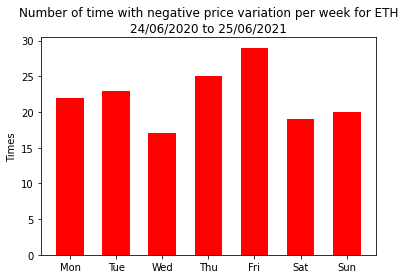

In [ ]:
#Comparar cantidad de variaciones negativas en el año por día
plt.bar(df_count_sorted.index, df_count_sorted['count'], width=0.6, color=['r'])
plt.title('Number of time with negative price variation per week for ETH\n24/06/2020 to 25/06/2021')
plt.ylabel('Times')
plt.show()

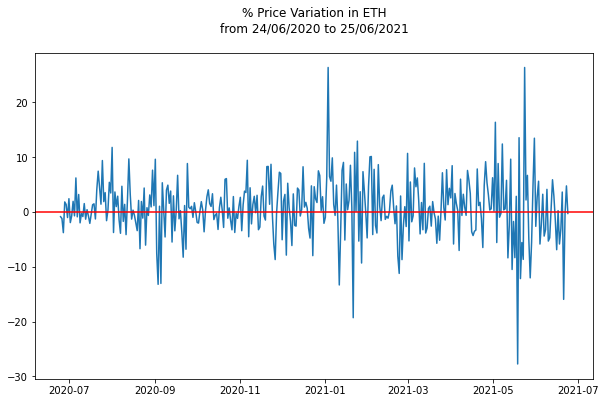

In [ ]:
# Variación en el tiempo  (negativa y positiva)
plt.figure(figsize=(10, 6))
plt.plot(df['date'],df['% var'])
plt.axhline(y=0, color='r')
plt.title('% Price Variation in ETH\nfrom 24/06/2020 to 25/06/2021\n')
plt.show()

Text(0.5, 1.0, '% Negative Price Variation in ETH\nfrom 24/06/2020 to 25/06/2021\n')

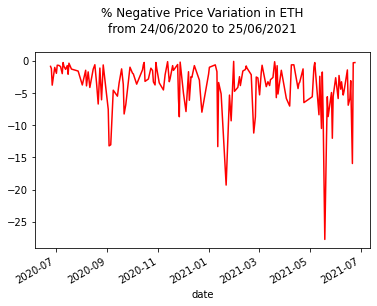

In [ ]:
# Variación en el tiempo (negativa)
df_neg.plot.line('date','% var', color='r', legend=False).set_title('% Negative Price Variation in ETH\nfrom 24/06/2020 to 25/06/2021\n')

## 4. Conclusión

El mejor día para comprar ETH es al final del viernes o al inicio del sábado, justo antes de que empiece a subir el precio.